In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
from cs231_utils.data_utils import load_tiny_imagenet

def get_subset_tiny_imagenet(num_training=16000, num_validation=2000, num_test=2000):
    """
    Load the a subset of the tiny imagenet dataset from disk and perform preprocessing to prepare
    it for our neural network classifiers. Also sets a seed to make sure we always get the same
    data sets.
    """
    # Set the seed.
    np.random.seed(231)
    
    # Load the raw tiny imagenet data. Note this by default loads normalized image data based on
    # then entire original sample.
    tiny_imagenet_dir = 'datasets/tiny-imagenet-200'
    data_dict = load_tiny_imagenet(tiny_imagenet_dir)
    X_train, y_train, X_val, y_val, X_test, y_test = (
        data_dict['X_train'], data_dict['y_train'],
        data_dict['X_val'], data_dict['y_val'],
        data_dict['X_test'], data_dict['y_test'])
        
    # Subsample training data.
    assert(num_training <= X_train.shape[0])
    print("Taking %s of %s training samples" % (num_training, X_train.shape[0]))
    mask = np.random.choice(X_train.shape[0], num_training, replace=False)
    X_train = X_train[mask]
    y_train = y_train[mask]
    assert(num_validation <= X_val.shape[0])
    print("Taking %s of %s validation samples" % (num_validation, X_val.shape[0]))
    mask = np.random.choice(X_val.shape[0], num_validation, replace=False)
    X_val = X_val[mask]
    y_val = y_val[mask]
    assert(num_test <= X_test.shape[0])
    print("Taking %s of %s test samples" % (num_test, X_test.shape[0]))
    mask = np.random.choice(X_test.shape[0], num_test, replace=False)
    X_test = X_test[mask]
    if y_test: y_test = y_test[mask]

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_subset_tiny_imagenet()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
if y_test:
    print('Test labels shape: ', y_test.shape)

loading training data for synset 20 / 200
loading training data for synset 40 / 200
loading training data for synset 60 / 200
loading training data for synset 80 / 200
loading training data for synset 100 / 200
loading training data for synset 120 / 200
loading training data for synset 140 / 200
loading training data for synset 160 / 200
loading training data for synset 180 / 200
loading training data for synset 200 / 200
Taking 16000 of 100000 training samples
Taking 2000 of 10000 validation samples
Taking 2000 of 10000 test samples
Train data shape:  (16000, 3, 64, 64)
Train labels shape:  (16000,)
Validation data shape:  (2000, 3, 64, 64)
Validation labels shape:  (2000,)
Test data shape:  (2000, 3, 64, 64)


In [22]:
# Load the actual data we want to train on based on our preprocessing script.
tiny_imagenet_dir = 'datasets/our-imagenet-100'
data_dict = load_tiny_imagenet(tiny_imagenet_dir)

loading training data for synset 20 / 20


In [25]:
X_train = data_dict['X_train']
X_val = data_dict['X_val']
y_train = data_dict['y_train']
y_val = data_dict['y_val']

In [26]:
X_train.shape

(5020, 3, 64, 64)

In [24]:
# Let's take a look at the data.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

80.0

TypeError: object of type 'bool' has no len()

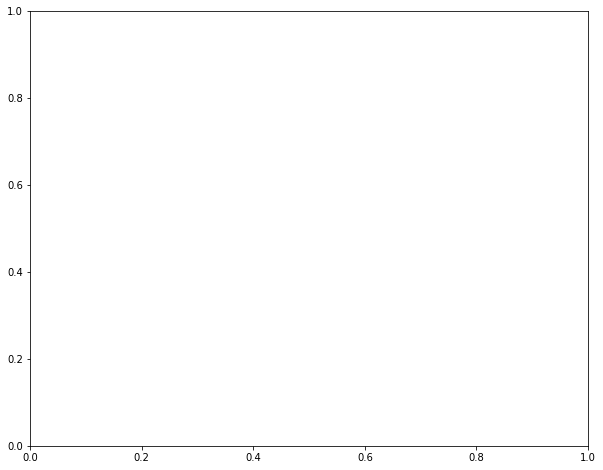

In [14]:
plt.hist(y_train, bins=200, color=True)

In [11]:
# use pretrained ResNet and SqueezeNet models to measure baseline classification
# The are trained in the full data set.

array([[[[  48.73049927,   49.38504791,   49.98954773, ...,   57.38803864,
            70.54152679,   82.86567688],
         [  46.05381775,   46.47036743,   46.98140717, ...,   46.41033936,
            60.75939941,   72.04730225],
         [  43.74064636,   44.01925659,   45.6473999 , ...,   37.28752136,
            49.63580322,   59.88773346],
         ..., 
         [  23.11158752,   23.53777313,   25.4380188 , ...,  100.1920929 ,
           102.33969116,  103.50766754],
         [  21.25218964,   21.66246796,   24.48140717, ...,   99.41246796,
           100.52049255,  101.64694214],
         [  20.31314087,   20.72837067,   23.53529358, ...,   99.44094849,
           100.66472626,  100.82473755]],

        [[  45.0772171 ,   45.78005219,   46.48074341, ...,  -60.9861908 ,
           -69.87033844,  -72.56282806],
         [  42.45810699,   42.9254837 ,   43.5253067 , ...,  -70.93002319,
           -78.62052917,  -81.34584045],
         [  40.28392792,   40.60555267,   42.33068848, 

In [3]:
import torchvision.models as models

# Random weights
resnet18_random = models.resnet18()
squeezenet_random = models.squeezenet1_0()

In [4]:
# Pre-trained
resnet18_trained = models.resnet18(pretrained=True)
squeezenet_trained = models.squeezenet1_0(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/nautilik/.torch/models/resnet18-5c106cde.pth
100.0%
Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /Users/nautilik/.torch/models/squeezenet1_0-a815701f.pth
100.0%
